<a href="https://colab.research.google.com/github/kushagrathisside/Software-Reliability-Prediction/blob/main/Software_Reliability_Prediction_Using_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and required modules

In [1]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import lazypredict

In [3]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

Working on datasets

In [5]:
df=pd.read_csv('/content/srp-class-csv.csv')
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'CLASS'],
      dtype='object')

In [6]:
df.corr()

,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,T,U,CLASS
A,1.00,0.90,0.72,0.90,0.95,0.94,-0.43,0.85,0.80,0.82,...,0.99,0.69,0.82,0.37,0.78,0.92,0.95,0.94,0.90,0.35
B,0.90,1.00,0.82,0.97,0.92,0.92,-0.38,0.87,0.67,0.86,...,0.92,0.52,0.73,0.33,0.77,0.83,0.93,0.91,1.00,0.30
C,0.72,0.82,1.00,0.78,0.75,0.75,-0.26,0.70,0.51,0.74,...,0.72,0.41,0.62,0.32,0.62,0.67,0.75,0.74,0.82,0.21
D,0.90,0.97,0.78,1.00,0.89,0.88,-0.37,0.82,0.67,0.81,...,0.92,0.52,0.69,0.30,0.73,0.80,0.90,0.87,0.96,0.30
E,0.95,0.92,0.75,0.89,1.00,0.99,-0.41,0.89,0.83,0.91,...,0.96,0.55,0.78,0.35,0.81,0.95,1.00,1.00,0.92,0.36
F,0.94,0.92,0.75,0.88,0.99,1.00,-0.38,0.86,0.80,0.93,...,0.95,0.55,0.77,0.36,0.77,0.93,0.99,0.99,0.92,0.34
G,-0.43,-0.38,-0.26,-0.37,-0.41,-0.38,1.00,-0.50,-0.40,-0.26,...,-0.42,-0.22,-0.34,-0.13,-0.56,-0.45,-0.41,-0.41,-0.38,-0.23
H,0.85,0.87,0.70,0.82,0.89,0.86,-0.50,1.00,0.68,0.78,...,0.86,0.47,0.73,0.30,0.93,0.84,0.89,0.89,0.87,0.39
I,0.80,0.67,0.51,0.67,0.83,0.80,-0.40,0.68,1.00,0.59,...,0.81,0.46,0.63,0.25,0.72,0.93,0.82,0.82,0.67,0.34
J,0.82,0.86,0.74,0.81,0.91,0.93,-0.26,0.78,0.59,1.00,...,0.83,0.44,0.69,0.37,0.63,0.77,0.90,0.91,0.87,0.27


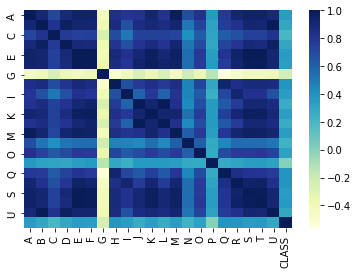

In [8]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [10]:
type(df.corr())

pandas.core.frame.DataFrame

In [13]:
df.corr()['CLASS']

A        0.35
B        0.30
C        0.21
D        0.30
E        0.36
F        0.34
G       -0.23
H        0.39
I        0.34
J        0.27
K        0.34
L        0.27
M        0.34
N        0.23
O        0.32
P        0.01
Q        0.39
R        0.39
S        0.35
T        0.36
U        0.30
CLASS    1.00
Name: CLASS, dtype: float64

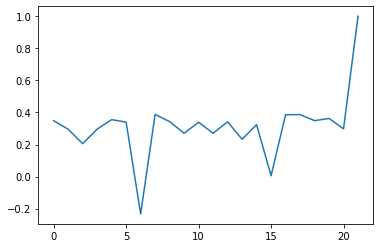

In [16]:
lineplot_class=np.array(df.corr()['CLASS'])
sns.lineplot(data=lineplot_class)

As the column P is weakly related to the target column i.e. Class, so we can remove it to reduce dimentionality

In [18]:
df=df.drop(['P'],axis=1)

In [20]:
len(df.columns)-1 # 1 is target column

20

Setting up X and y

In [26]:
X=df[df.columns.drop(['CLASS'])]
Y=df['CLASS']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=1)

In [28]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:04<00:00,  7.02it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.75               0.71     0.71      0.78   
NearestCentroid                    0.79               0.69     0.69      0.80   
LGBMClassifier                     0.86               0.66     0.66      0.85   
GaussianNB                         0.82               0.65     0.65      0.82   
LabelPropagation                   0.84               0.64     0.64      0.83   
DecisionTreeClassifier             0.82               0.64     0.64      0.82   
ExtraTreesClassifier               0.86               0.64     0.64      0.84   
KNeighborsClassifier               0.85               0.63     0.63      0.84   
LabelSpreading                     0.84               0.63     0.63      0.83   
ExtraTreeClassifier                0.81               0.63     0.63      0.81   
LinearDiscriminantAnalysis  

Trying crossvalidation (K=10) as per the given report1 in https://github.com/SarthakSahoo/Software-Reliability-Prediction-Using-Ensemble-Learning/blob/master/Document/report1.pdf 

In [30]:
from sklearn.model_selection import cross_validate

In [33]:
result = cross_validate(LazyClassifier , X, Y, cv=10,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

TypeError: ignored